In [2]:
import pandas as pd
#import quandl
import nasdaqdatalink
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pprint
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier

forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 10% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  
df.dropna(inplace=True)  # We shift the data up and drop the NaN last 10% data in label.
print('df.head():')
pp.pprint(df.head())
X = np.array(df.drop(['label'], axis=1)) # we take out the label data in X.
y = np.array(df['label'])           # we add the label data in y.
X = preprocessing.scale(X)
y = np.array(df['label'])
print('len(X):', len(X), 'len(y):', len(y))

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
# We use Linear Regression
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('LinearRegression => accuracy:', accuracy)
# We can use svm.SVR
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('svm => accuracy:', accuracy)

df.head():
            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849
len(X): 3389 len(y): 3389
LinearRegression => accuracy: 0.9788671618299348
svm => accuracy: 0.788851989583987


In [5]:
import pandas as pd
#import quandl
import nasdaqdatalink
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pprint
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier

forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  

# 1. we take out the label data in X.
X = np.array(df.drop(['label'], axis=1))
# 2. X = 0% to 99% (drop last 1%).
X = X[:-forecast_out]
# X_lately = Get X (99% to 100%).
X_lately = X[-forecast_out:]   
# Scale 99% X data.
X = preprocessing.scale (X)
df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
# We use Linear Regression
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('accuracy:', accuracy)

accuracy: 0.98041197609265


In [51]:
import pandas as pd
#import quandl
import nasdaqdatalink
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pprint
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier

forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  

X = np.array(df.drop(['label'], axis=1))
df.dropna (inplace=True)
#print('1 X.shape:', X.shape) # X.shape: (3424, 4)
#print('1 X[3379:3389]:')
#print(X[3379:3389])
X_scale = preprocessing.scale (X)
#print('2 X_scale.shape:', X_scale.shape) # 2 X_scale.shape: (3424, 4)

X = X_scale[:-forecast_out]
#print('3 X.shape:', X.shape) # 3 X.shape: (3389, 4)
#print('X[3379:3389]:')
#print(X[3379:3389])

X_lately = X_scale[-forecast_out:]  
print('X_lately.shape:', X_lately.shape)  # X_lately.shape: (35, 4)
print('X_lately[:5]:')
print(X_lately[:5])

df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])
print('y.shape:', y.shape) # y.shape: (3389,)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
X_test_set = clf.predict (X_test)  # test x_test
forecast_set = clf.predict (X_lately)  # last 30 days

print('X_test[:5]:')
print(X_test[:5])
print('X_test_set[:5]:')
print(X_test_set[:5])
print('forecast_set:')
print(forecast_set)
print('accuracy: ', accuracy)
print('froecast_out:', forecast_out)

X_lately.shape: (35, 4)
X_lately[:5]:
[[ 2.62040424 -0.69832022  3.25839716 -0.49545744]
 [ 2.50780834  1.66160318 -1.79354019 -0.6394908 ]
 [ 2.31454846  4.17610055 -3.38541422 -0.57613569]
 [ 2.46132664 -0.23766898  1.15324503 -0.41015315]
 [ 2.50451039 -0.01764958 -0.11604074 -0.60898579]]
y.shape: (3389,)
X_test[:5]:
[[ 0.6958757  -0.55007521  0.12067494 -0.7574724 ]
 [-0.63610184 -0.27244827  0.25539898  0.13011175]
 [-0.50151802  0.97893073 -1.17519545  0.333143  ]
 [ 1.39756311 -0.50950657 -0.1925864  -0.804889  ]
 [-0.35113286 -0.40372601 -0.32678522 -0.55373641]]
X_test_set[:5]:
[603.39680525 253.77041922 287.75828939 786.11392443 329.90586738]
forecast_set:
[1105.2177674  1074.4472056  1023.80693703 1062.56101254 1073.87510183
 1074.0528035  1092.97791277 1111.57195884 1115.73344543 1124.30530914
 1134.43773293 1130.22609044 1148.90578707 1164.63396614 1137.37667025
 1123.68281586 1090.47131777 1104.59103593 1115.51842433 1121.22442484
 1136.01208851 1150.20777941 1181.991209

forecast_set:
[1105.67073893 1076.32347382 1024.53307171 1064.04153768 1076.03319623
 1076.17747151 1094.83836778 1113.94604183 1117.66802827 1125.88523583
 1135.65515578 1132.47385188 1151.41510364 1167.11647629 1139.58922133
 1125.74571993 1092.12975316 1106.15073332 1117.24748162 1123.85529757
 1137.92611113 1152.53407849 1184.16170213 1188.98689482 1161.81620695
 1171.80031908 1173.67117021 1156.65657756 1121.81069212 1117.8993573
 1116.0601999  1073.6953702  1046.60492827 1075.59940882 1026.00814563]
accuracy:  0.980278805886175
froecast_out: 35

last_data_all:
Adj. Close     1.068760e+03
HL_PCT         4.325574e+00
PCT_change    -2.893850e+00
Adj. Volume    3.742469e+06
label          1.006940e+03
Forecast                NaN
Name: 2018-02-05 00:00:00, dtype: float64

last_data: 2018-02-05 00:00:00
last_unix: 1517788800.0
next_unix: 1517875200.0

10 df.shape: (3389, 6)
11 df['Forecast'].tail():
Date
2018-01-30   NaN
2018-01-31   NaN
2018-02-01   NaN
2018-02-02   NaN
2018-02-05   N

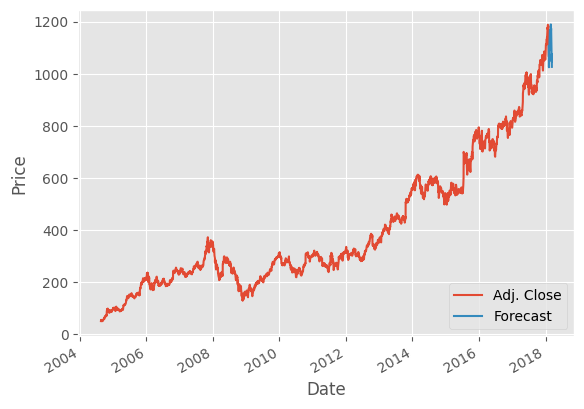

In [71]:
# We plot the result by matplot lib.
import pandas as pd
import nasdaqdatalink
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pprint

style.use('ggplot')

pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier

forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  

X = np.array(df.drop(['label'], axis=1))
X_scale = preprocessing.scale (X)
X = X_scale[:-forecast_out]
X_lately = X_scale[-forecast_out:]   

df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict (X_lately)  # last 30 days

print('forecast_set:')
print(forecast_set)
print('accuracy: ', accuracy)
print('froecast_out:', forecast_out)
df['Forecast'] = np.nan
# get the last df,
print()
last_date_all = df.iloc[-1]
print('last_data_all:')
print(last_date_all)
print()
last_date = df.iloc[-1].name  # row -1 (index of last row). "name" is attribute of API.
print('last_data:', last_date) # last_data: 2018-02-05 00:00:00
last_unix = last_date.timestamp()
print('last_unix:', last_unix) # last_unix: 1517788800.0 (unix time stamp)
one_day = 86400   # 60 x 60 x 24 = 86400sec
next_unix = last_unix + one_day 
print('next_unix:', next_unix) # next_unix: 1517875200.0
print()
i_cnt = 0
print('10 df.shape:', df.shape)   # 10 df.shape: (3389, 6)
print ("11 df['Forecast'].tail():")
print (df['Forecast'].tail())
print()
print ("12 forecast_set.shape:", forecast_set.shape) # 12 forecast_set.shape: (35,) 
for i in forecast_set:
    next_data = datetime.datetime.fromtimestamp (next_unix)
    next_unix += one_day
    # Repalce all columns with nan which is at locaiotn 'forecast' at [len(df.columns) - 1] with forecast data [i] 
    df.loc[next_data] = [np.nan for _ in range(len(df.columns) -1)] + [i]
    if i_cnt % 100 == 0:
        print ('15 i:', i)                   # 15 i: 1101.161580115335
        print('15 next_data:', next_data)    # 15 next_data: 2018-02-05 16:00:00
    i_cnt += 1
print()
# We add additional 1% prediction at the end.
print('21 df.shape:', df.shape)     # 11 df.shape: (3424, 6)
print()
print('22 df.head():')
print(df.head())   
# 12 df.shape: (3424, 6)
print()
print ("23 df['Adj. Close'].head():")
print (df['Adj. Close'].head())
print()
print ("25 df.tail():")
print (df.tail())
print()
print ("25 df['Forecast'].tail():")
print (df['Forecast'].tail())
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

forecast_set:
[1100.50886561 1071.24692925 1017.43155941 1059.74630251 1072.11183879
 1072.40321859 1090.92892165 1110.35634934 1113.24492449 1121.12218119
 1130.11311673 1128.11165523 1147.79348505 1163.3958516  1134.67973439
 1120.91163422 1086.40395443 1101.92321443 1112.93290389 1120.33447433
 1133.87448263 1148.70343706 1180.09134919 1184.44257723 1155.91464989
 1167.36644068 1169.18954107 1151.97295128 1117.44683023 1113.98280309
 1111.47310915 1068.59275244 1040.41580063 1072.10629669 1019.0792315 ]
accuracy:  0.9782940730338908
froecast_out: 35


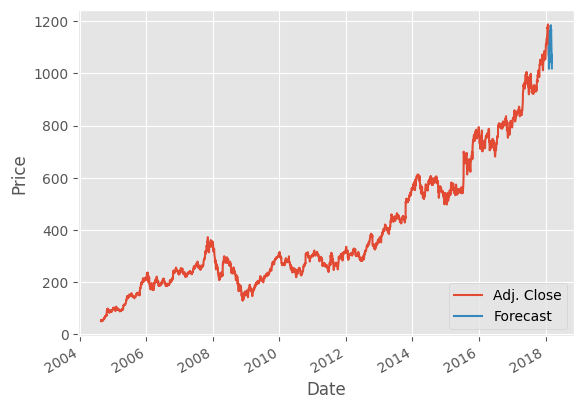

In [4]:
import pandas as pd
import nasdaqdatalink
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pprint
style.use('ggplot')
pp = pprint.PrettyPrinter(indent=4)
df = nasdaqdatalink.get("WIKI/GOOGL")
#df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)  # fiill in outlier
forecast_out = int(math.ceil(0.01*len(df)))  # Predict with 1% out the data
df['label'] = df[forecast_col].shift(-forecast_out)  
X = np.array(df.drop(['label'], axis=1))
X_scale = preprocessing.scale (X)
X = X_scale[:-forecast_out]
X_lately = X_scale[-forecast_out:]   
df.dropna (inplace=True)   # Drop any "NaN" rows
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict (X_lately)  # last 30 days
print('forecast_set:')
print(forecast_set)
print('accuracy: ', accuracy)
print('froecast_out:', forecast_out)
df['Forecast'] = np.nan
last_date_all = df.iloc[-1]
last_date = df.iloc[-1].name  # row -1 (index of last row). "name" is attribute of API.
last_unix = last_date.timestamp()
one_day = 86400   # 60 x 60 x 24 = 86400sec
next_unix = last_unix + one_day  
for i in forecast_set:
    next_data = datetime.datetime.fromtimestamp (next_unix)
    next_unix += one_day
    df.loc[next_data] = [np.nan for _ in range(len(df.columns) -1)] + [i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()